In [3]:
import sys, os
sys.path.append(os.path.abspath(".."))
from aiBrain.FireDetector import FireDetector
from aiBrain.simulate_sensors import generate_rapid_fire_scenarios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
data = generate_rapid_fire_scenarios(100)
detector = FireDetector(temp_delta_thresh=10, smoke_delta_thresh=200)

In [5]:
results = []

for entry in data:
    pre = detector.preprocess(entry)
    scores = detector.calculate_fire_risk(pre)
    rapid = detector.detect_rapid_rise(pre)
    action = detector.detect_fire(scores, rapid_rise=rapid)
    results.append({
        "timestamp": entry["timestamp"],
        "global_score": scores["global"],
        "rapid_rise": rapid,
        "action": action
    })

In [6]:
df = pd.DataFrame(results)
df.head(10)

,timestamp,global_score,rapid_rise,action
0,2025-12-02T15:41:49.872446,0.0,False,Nothing to do
1,2025-12-02T15:41:32.872446,0.0,False,Nothing to do
2,2025-12-02T15:42:31.872446,1.0,True,WARNING: start alarm
3,2025-12-02T15:41:20.872446,0.0,False,Nothing to do
4,2025-12-02T15:42:11.872446,1.0,True,WARNING: start alarm
5,2025-12-02T15:41:38.872446,0.0,False,Nothing to do
6,2025-12-02T15:41:28.872446,0.0,True,WARNING: start alarm
7,2025-12-02T15:42:12.872446,1.0,True,WARNING: start alarm
8,2025-12-02T15:42:38.872446,1.0,True,WARNING: start alarm
9,2025-12-02T15:42:48.872446,1.0,True,WARNING: start alarm


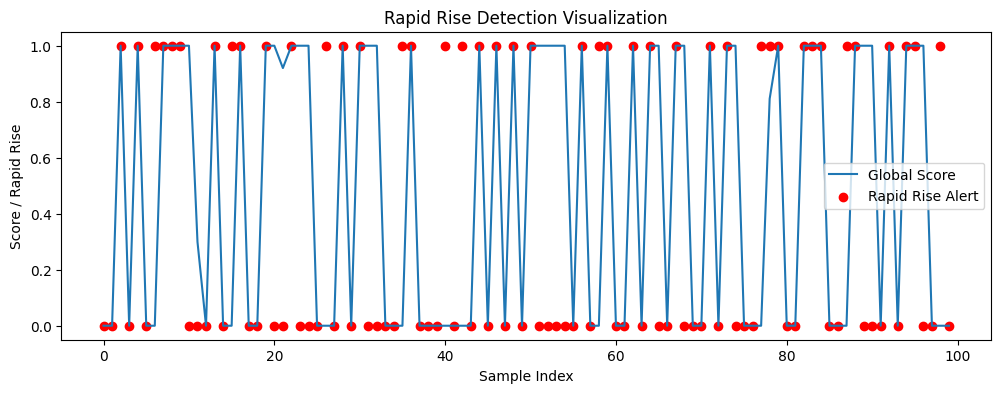

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['global_score'], label='Global Score')
plt.scatter(df.index, df['rapid_rise'].astype(int), color='red', label='Rapid Rise Alert')
plt.xlabel("Sample Index")
plt.ylabel("Score / Rapid Rise")
plt.title("Rapid Rise Detection Visualization")
plt.legend()
plt.show()

In [8]:
y_true = [1]*50 + [0]*50  # fire first, normal after
y_pred = [(1 if r["action"]=="WARNING: start alarm" else 0) for r in results]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 0.47, Recall: 0.56, F1: 0.51
